# Home Credit Default Risk
We are going to predict how capable each applicant is of repaying a loan.


### Download the competion file
I use the API provided by the compeition to download the competition data; which is a zip file file.

In [3]:
!kaggle competitions download -c home-credit-default-risk

100%|████████████████████████████████████████| 688M/688M [02:03<00:00, 9.15MB/s]
100%|████████████████████████████████████████| 688M/688M [02:03<00:00, 5.86MB/s]


### Unzip the file 

In [35]:
import os
import zipfile

with zipfile.ZipFile("home-credit-default-risk.zip", 'r') as zip_ref:
    zip_ref.extractall('home_credit_data')

The data folder contain: 
* application_train and application_test: the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
* bureau: data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* bureau_balance: It's monthly data about the previous credit in bureau
* previous_application: previous applications for loans at Home credit of clients who have loans in the application data
* POS_CASH_BALANCE: monthly data about previous point of sale or cash loans clients have had with Home Credit
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit.
* installments_payment: payment history for previous loans at Home Credit.
The competition page provide a diagramm that discribe ad shows how data is related

In [62]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
#import train data
train_data = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/application_train.csv")
train_data.shape

(307511, 122)

The train dataset contain 307511 observations and 122 variables (features). Each row in the dataset correspond to a given loan. Since this is the train data the features include the target variable which labelized as "Target". "Target" is the variable we want to predict.

In [66]:
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#import test data
test_data = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/application_test.csv")
test_data.shape

(48744, 121)

The test data contain 48744 observations which is more than the train data. There is 121 variables because the target variable is excluded since it's the one we would like to predict.

In [69]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
#Columns types
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [71]:
# Number of unique classes in each object column
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Exploratory Data Analysis
In this section I will calculate statistics and make figure to find trends, patterns and/or relationshop beatween variables within the dataset. I aim here to get what our data can tell us.
Let's dive into the explanatory data analysis by :
* Examining the distribution of the target
* Looking for missing values
* Encoding categorical variable (way to deal with them since most of the categorial variables have small numberof unique variable)

In [73]:
train_data["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

There is two modalities in the "target". 0 that indicate that the clients repaid its loan in time and 1 that indicate that the client had paiement difficulties. The first observation from the counts is that, most of the clients repaid the load in time. It's about 282686 clients that had not payment issues.
we can choose to have a proper look on that by ploting the distribution of loan with the target as following.

<Axes: ylabel='Frequency'>

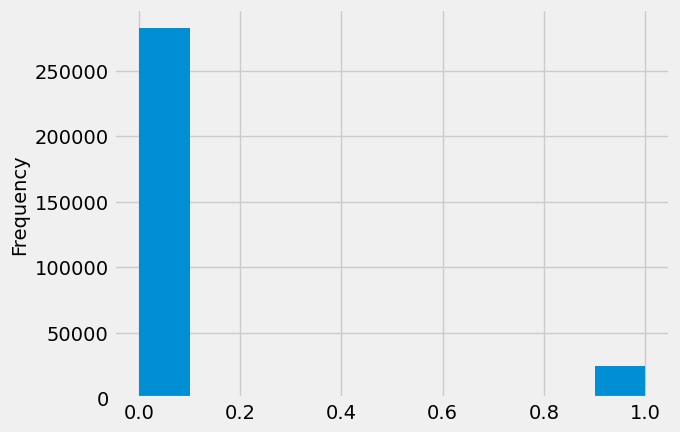

In [75]:
train_data["TARGET"].plot.hist()

The histogram shows as we have mentionned, that there is an imbalanced class problem. We have more loan that has been repaid than loans that were not repaid. This is important to know because when we get into the modeling part, we can weight the classes by their representation in the data to reflect this imbalance.

#### Missing Values ??
We can loook for missing variables by going through each column to conty the missing variable. But it's more interesting to do it at once by defining a function that will count missing values within each column

In [78]:
# Function to calculate missing values by column 
def missing_values_table(data):
        # Total missing values
        mis_val = data.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * data.isnull().sum() / len(data)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(data.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [80]:
# Missing values statistics
missing_values = missing_values_table(train_data)
missing_values.head(5)

The dataset has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4


#### Encoding categorical variables
There are 2 approaches we can rely on when it commes to encoding variables; One-hot-encoding or Label encoding. Label encoding which assign random integer for each category within the variable.The assigment obviously does not necessarly reflect the categories aspect. The One-hot-encoding the create a new colum for each category and each observation receives a 1 in the column for its corresponding category and 0 in all other new column.
We will use here label encoding for the variables that have 2 categories and one-hot-encoding for thos with more than 2 categories.

In [83]:
#label encoding using Scikit-Learn LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0
#Initialize encoding dataframe
train_En=train_data
test_En=test_data
# Iterate through the columns
for col in train_data:
    if train_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_data[col])
            # Transform both training and testing data
            train_En[col] = le.transform(train_data[col])
            test_En[col] = le.transform(test_data[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [87]:
# one-hot encoding of categorical variables
train_En = pd.get_dummies(train_data)
test_En = pd.get_dummies(test_data)

In [90]:
#let match column in test and test dataset in order to have the same fetaure in both dataset
train_T = train_En['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_En, test_En = train_En.align(test_En, join = 'inner', axis = 1)

# Add the target back in
train_En['TARGET'] = train_T

In [92]:
train_En.shape

(307511, 240)

In [94]:
test_En.shape

(48744, 239)

While i was scrolling through the dataset, some columns caught my attention because they were negative. The days columns :
* DAYS_BIRTH : Client's age in days at the time of application
* DAYS_EMPLOYED : How many days before the application the person started current employment
* DAYS_REGISTRATION : How many days before the application did client change his registration
* DAYS_ID_PUBLISH  : How many days before the application did client change the identity document with which he applied for the loan.
So I decided to lookout
It's negative values in the following cell because The days of application is consier as date 0. So any day before the application date is consider Negative count. we can multiplie by _1 if we'd like to uise positive date ; and divided by 365 if we want them ion term of year.

DAYS_BIRTH; DAYS_REGISTRATION; DAYS_ID_PUBLISH look reasonnable because the maximum value is either 0 or a negative valur which make sens regarding the details we've just given; as weel as the means. But DAYS_EMPLOYED does not look normal because we have a positive means but also the maximum value is positive and near 1000 years which is not reasonnable.



In [97]:
train_En[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [98]:
(train_En['DAYS_BIRTH']/ -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Text(0.5, 0, 'Days Birth')

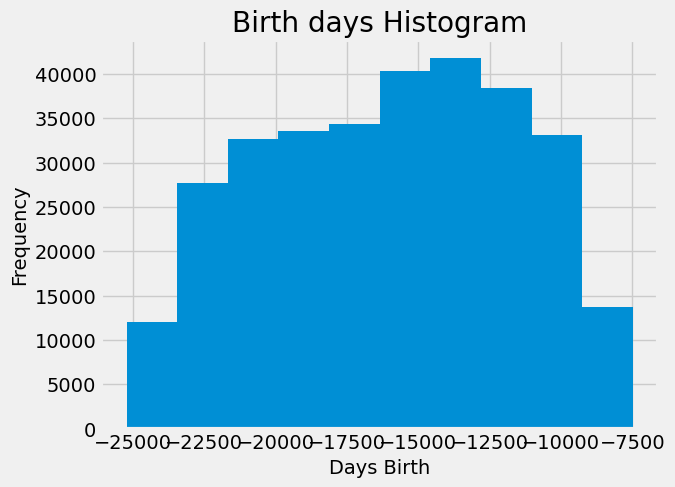

In [100]:
train_En['DAYS_BIRTH'].plot.hist(title = 'Birth days Histogram');
plt.xlabel('Days Birth')

In [101]:

train_En['DAYS_EMPLOYED'].value_counts()

DAYS_EMPLOYED
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: count, Length: 12574, dtype: int64

Text(0.5, 0, 'Days Employment')

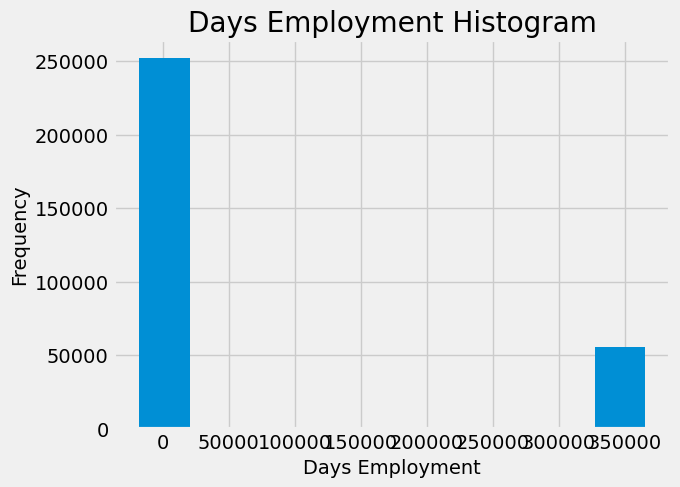

In [102]:
# Let's look at the distribution
train_En['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

It looks like we are facing outliers. But its a little nit difficult to get precisely what's about. so we plot the distribution to have better look on the values. In my position I can not provided proper explanation on why we do have those values. This can be due to error or anything alse. As it does not meake sense for us in term of the comprehension we have on the days values, I will replace them by missig value in order to keep logic in the dataset.

In [104]:
# Create an anomalous flag column
train_En['DAYS_EMPLOYED_ANOM'] = train_En["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_En['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)


Text(0.5, 0, 'Days Employment')

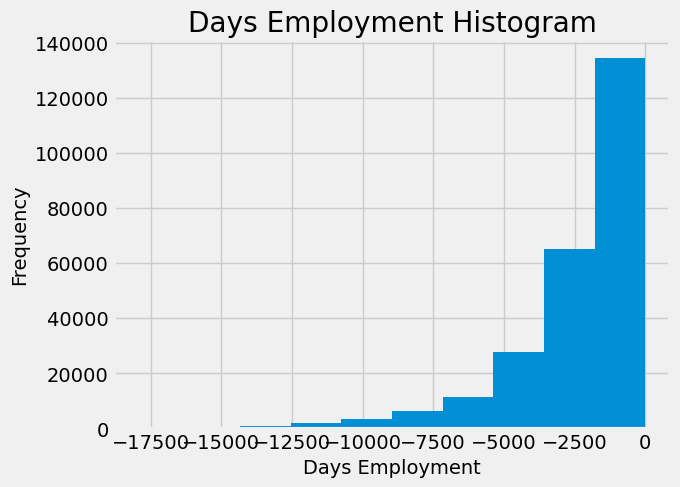

In [106]:
train_En['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')

As we can see, by turning the anomalous value into missing the column make sense. The values are Lower or equal to 0 as expected.

In [113]:
test_En['DAYS_EMPLOYED_ANOM'] = test_En["DAYS_EMPLOYED"] == 365243
test_En["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_En["DAYS_EMPLOYED_ANOM"].sum(), len(test_En)))

There are 9274 anomalies in the test data out of 48744 entries


In [116]:
correlations = train_En.corr()

In [117]:
corr_target = correlations["TARGET"].sort_values()
corr_target 

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
                                          ...   
REGION_RATING_CLIENT                    0.058899
REGION_RATING_CLIENT_W_CITY             0.060893
DAYS_EMPLOYED                           0.074958
DAYS_BIRTH                              0.078239
TARGET                                  1.000000
Name: TARGET, Length: 241, dtype: float64

In [120]:
# Display correlations 
print('Most Positive Correlations:\n', corr_target.tail(15))
print('\nMost Negative Correlations:\n', corr_target.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

"DAYS_BIRTH" has the highest positive correlation with the target, followed by "DAYS_EMPLOYED" and "REGION_RATING_CLIENT_W_CITY". But let recall that the values of "DAYS_BIRTH" are negatives for reasons we have explained earlier. So the interpretation should be consider as negative correlation. so ,as the clients get older there is negative linear relationship with the target, which means that they tend to repaid their loan.
If we use absolute value for that column we will get negative correlation as explained.
"EXT_SOURCE_1","EXT_SOURCE_2" and "EXT_SOURCE_3" have strongest negative correlation with the target.   

Text(0.5, 1.0, 'Correlation Heatmap')

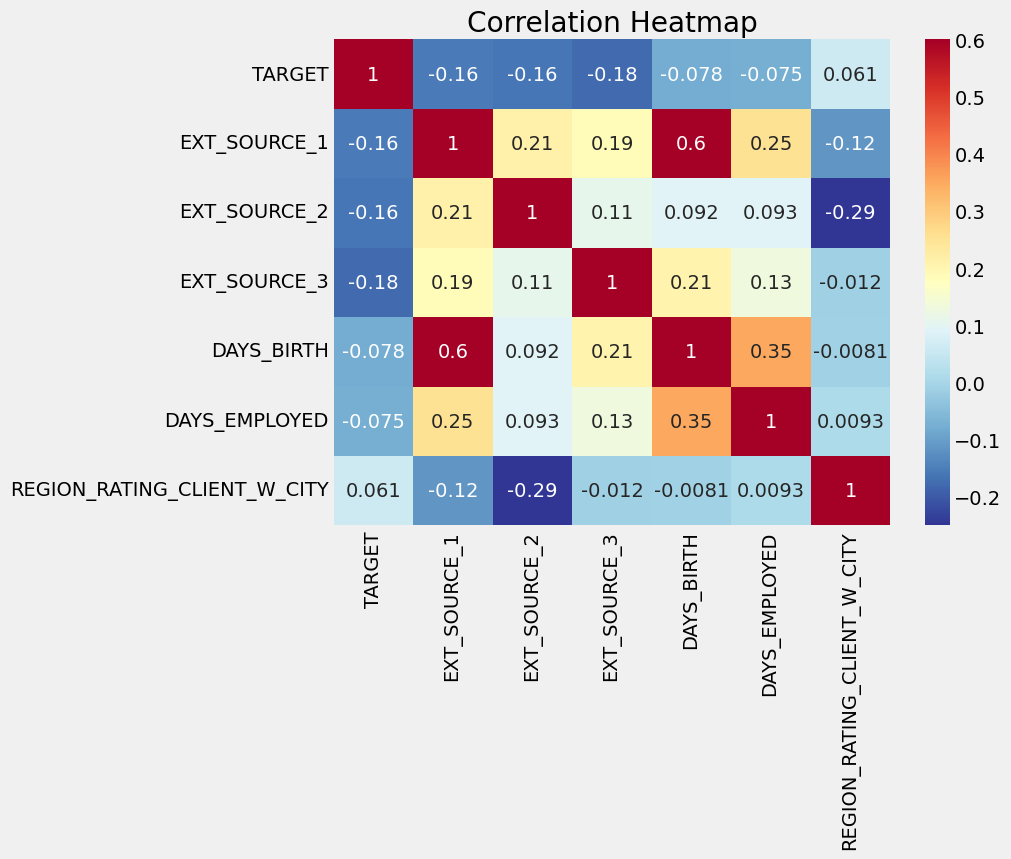

In [154]:
sub_data = train_En[["TARGET", "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH","DAYS_EMPLOYED","REGION_RATING_CLIENT_W_CITY"]]
sub_data_corrs = sub_data.corr()


# Heatmap of correlations for the features with highest correlation
plt.figure(figsize = (8, 6))

sns.heatmap(sub_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Count')

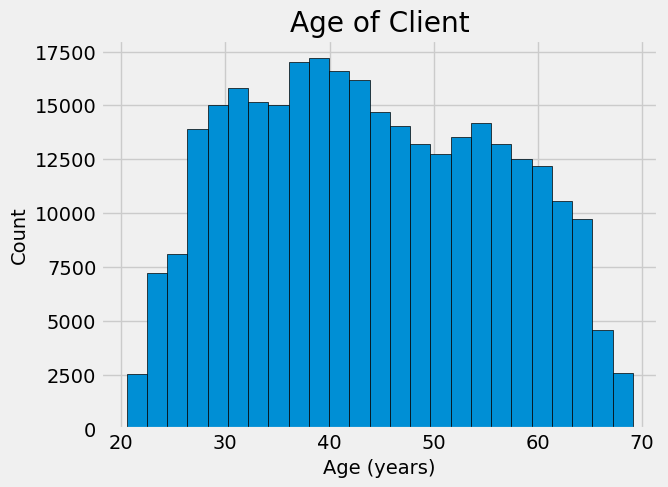

In [124]:
train_En['DAYS_BIRTH'] = abs(train_En['DAYS_BIRTH'])
train_En['DAYS_BIRTH'].corr(train_En['TARGET'])


plt.style.use('fivethirtyeight')# Set the style of plots

# Plot the distribution of ages in years
plt.hist(train_En['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count')

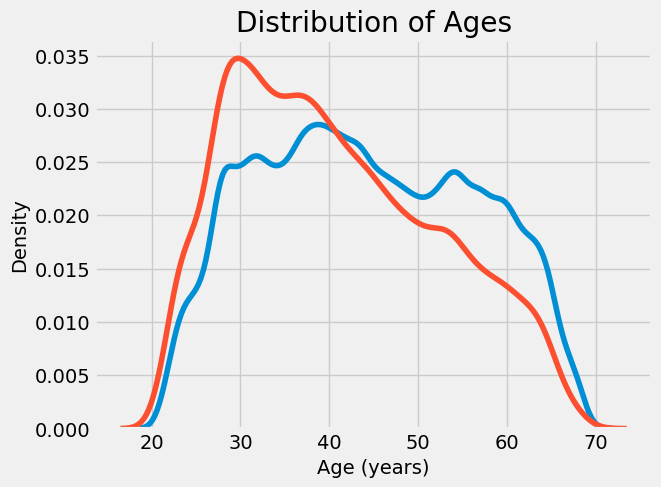

In [125]:
# KDE plot of loans that were repaid on time
sns.kdeplot(train_En.loc[train_En['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_En.loc[train_En['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

As the distribution of age does not give any insight in the relationship with the target. A KDE (Kernel Density Plot) is appropriate to have a look on how the age has an effect on the target. And we can see that the red curve which represent the KDE for the target==1 is skew toward the younger clients; suggesting that younger individuals have a higher representation in the dataset where the target equals 1.
Let look at this relationship using age classes.

In [127]:
# Age information into a separate dataframe
age_data = train_En[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = train_En['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
#age_data.head(10)

# Group by the bin and calculate averages
age_classes  = age_data.groupby('YEARS_BINNED').mean()
#age_classes

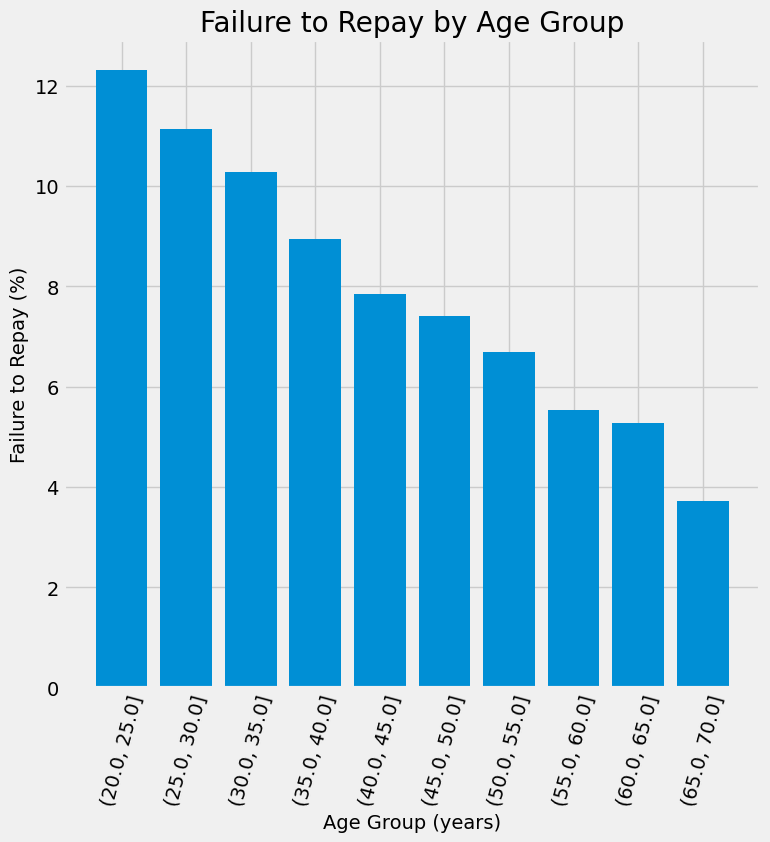

In [128]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_classes.index.astype(str), 100 * age_classes['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

This histogram is much more clean and confirm the trend that younger clients are more likely to not repay the loan

Let's have a look on the distribution that described for how long the client have been working before the application for the loan. "DAYS_EMPLOYED" is a count of the number of days that the clients have worked in they current job.

Text(0, 0.5, 'Count')

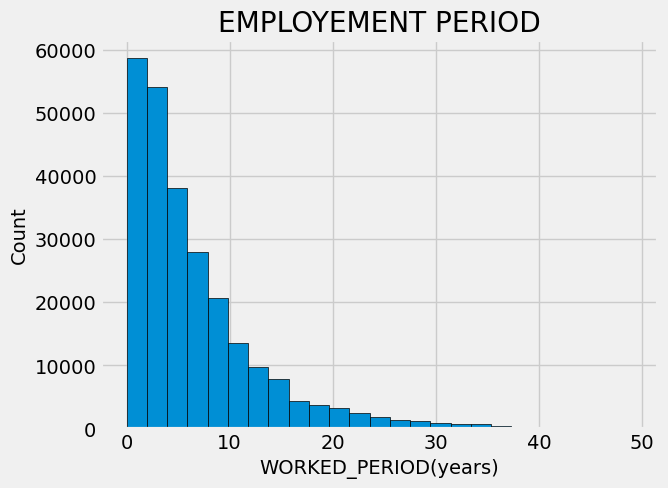

In [138]:
train_En['DAYS_EMPLOYED'] = abs(train_En['DAYS_EMPLOYED'])
train_En['DAYS_EMPLOYED'].corr(train_En['TARGET'])


plt.style.use('fivethirtyeight')# Set the style of plots

# Plot the distribution of ages in years
plt.hist(train_En['DAYS_EMPLOYED'] / 365, edgecolor = 'k', bins = 25)
plt.title('EMPLOYEMENT PERIOD'); plt.xlabel('WORKED_PERIOD(years)'); plt.ylabel('Count')

The first look at the histogram shows that most of the clients have less than 10 years in their current job.

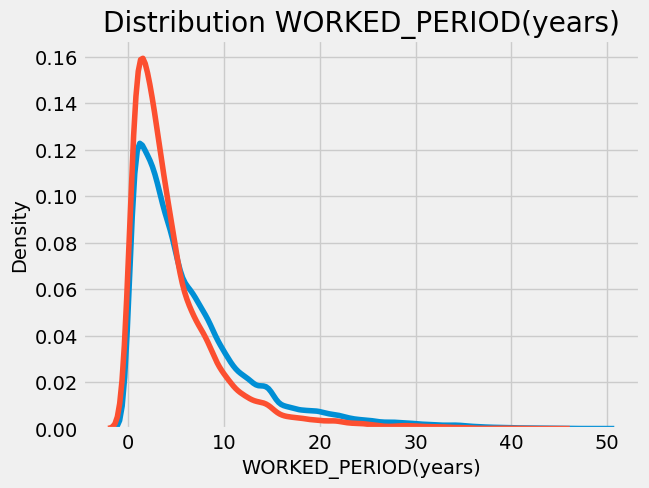

In [140]:
# KDE plot of loans that were repaid on time
sns.kdeplot(train_En.loc[train_En['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_En.loc[train_En['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('WORKED_PERIOD(years)'); plt.ylabel('Density'); plt.title('Distribution WORKED_PERIOD(years)');

This KDE descibe the relationship between the worked period and the target. Unlike the age distribution they is less variability in the data and the KDE for target==1 is skew toward client that have less than 10 years of seniority in their current JOB. This suggest that clients that have less seniority in their Job are more representative when Target==1. They are more likely to default on their loan.

Now let's look at the relationship of the target with the variables that have higher negative correlation. EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3 are the features with the strongest negative correlation with the target. These variables represent a "normalized score from the external data source". 

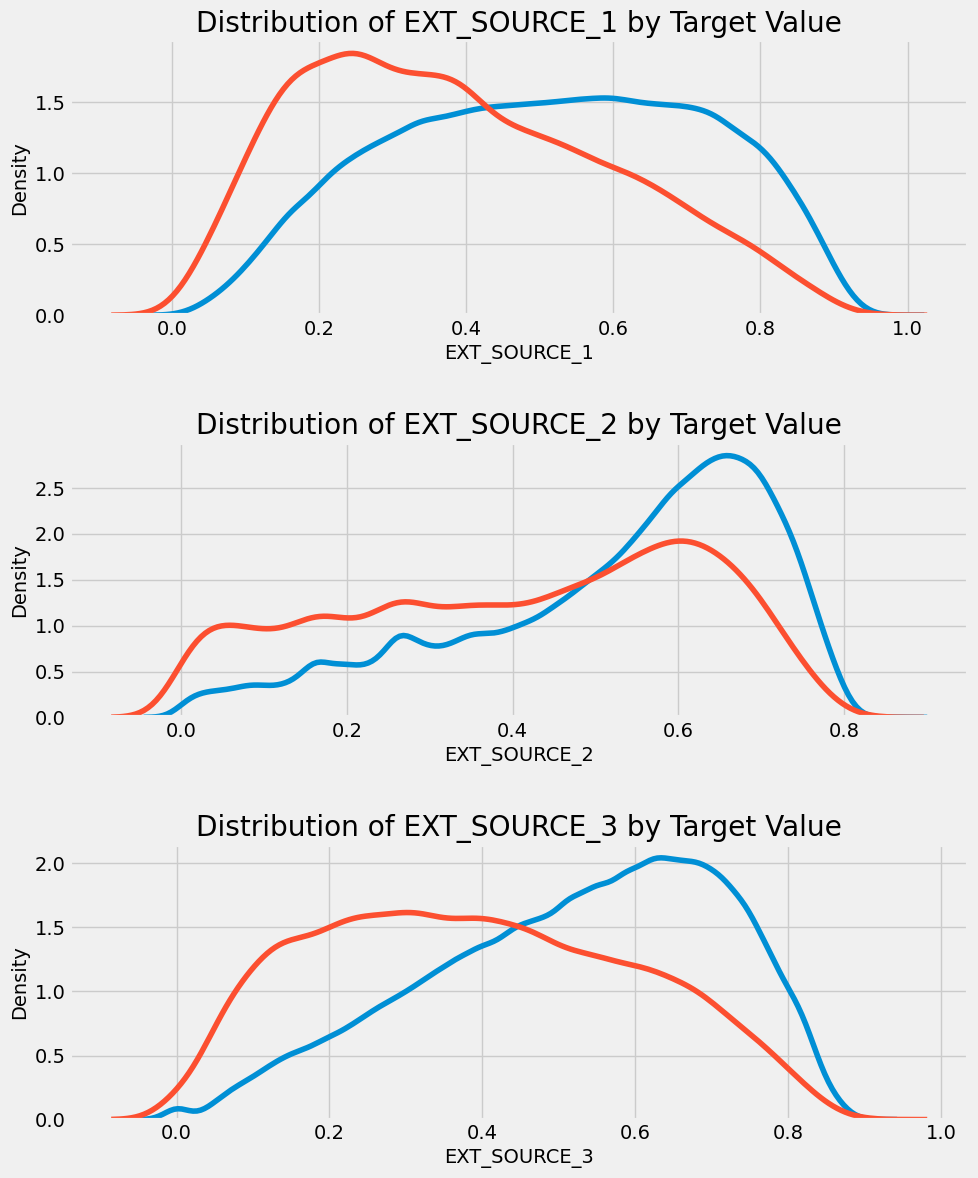

In [156]:
# KDE for the negative correlated features
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1) # i+1 is for the iteration 
    # plot repaid loans
    sns.kdeplot(train_En.loc[train_En['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(train_En.loc[train_En['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5) # adjust the spacing between subplots to prevent overlapping and ensure a neat layout

### Features Engenering

As we've mentionned earlier we got several dataset available. We have to go through all data source and get fetaure and insigh for the modeling step. We are going to build new feature or get usefull feature from each data source.

The dataset bureau  contain all information about the clients previous loan. Each row in this dataset represent a single loan. So it's possible that one client had severals loan outstanding before application. Let dive into the data and see what we will get.

In [165]:
#import train data
bureau_data = pd.read_csv("/Users/berichzinsou-daho/Documents/Berich Zinsou-daho/Portfolio/Project portfolio/Home Credit Default Risk/Data/home_credit_data/bureau.csv")
bureau_data.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN
